<a href="https://colab.research.google.com/github/AbhijithP96/DeepL_CV/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [4]:
transform_train = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,),(0.5,))])

transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
training_dataset = datasets.CIFAR10(root ='./data', train=True, download=True, transform=transform_train)

Files already downloaded and verified


In [5]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * (np.array([0.5,0.5,0.5])) + np.array([0.5,0.5,0.5])
  image = image.clip(0,1)
  return image

In [6]:
training_loader = torch.utils.data.DataLoader(dataset = training_dataset , batch_size = 100 , shuffle = True)

val_dataset = datasets.CIFAR10(root ='./data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset , batch_size = 100 , shuffle = False)

Files already downloaded and verified


In [7]:
classes = ['plane', 'car', 'bird', 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

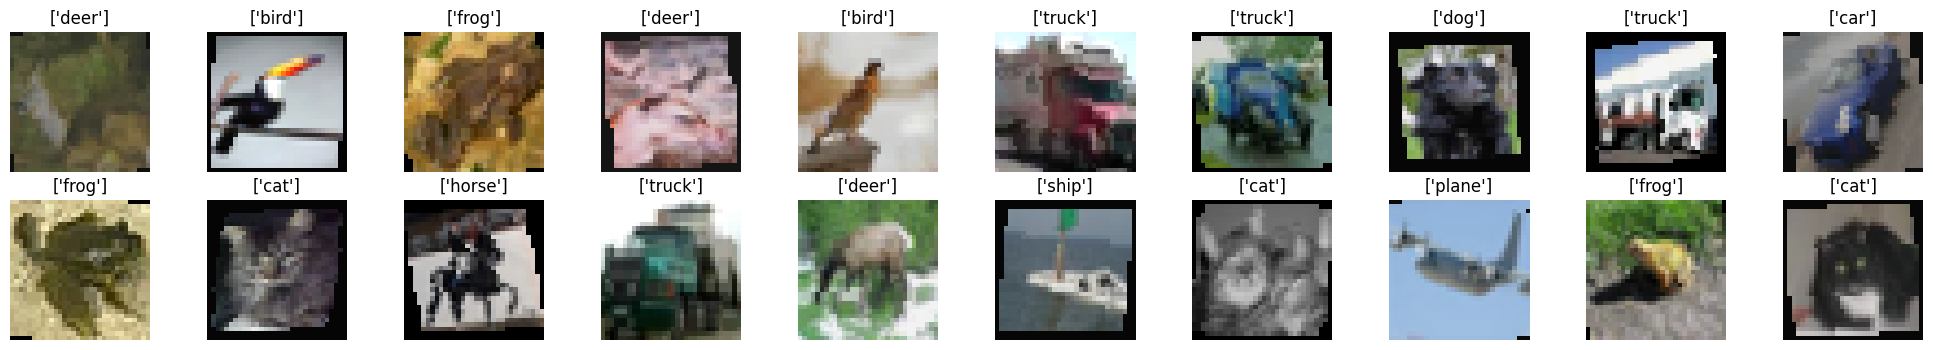

In [8]:
dataiter = iter(training_loader)
images , labels = next(dataiter)
fig = plt.figure(figsize = (25,4))

for i in range(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.axis('off')
  ax.set_title([classes[labels[i].item()]])

In [25]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,16,3,1,padding=1)
    self.conv2 = nn.Conv2d(16,32,3,1,padding=1)
    self.conv3 = nn.Conv2d(32,64,3,1,padding=1)
    self.fc1 = nn.Linear(4*4*64,500)
    self.dropout = nn.Dropout(0.5)
    self.fc2 = nn.Linear(500,10)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(-1,4*4*64)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x


In [26]:
model = LeNet().to(device)

In [27]:
criterion = nn.CrossEntropyLoss() #includes softmax
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)

In [28]:
epochs = 15
losses = []
acc = []

val_losses = []
val_acc = []

for e in range(epochs):
  run_e_loss = 0.0
  run_e_acc = 0.0

  run_v_loss = 0.0
  run_v_acc = 0.0
  for images,labels in training_loader:
    inputs = images.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs,1)
    run_e_loss += loss.item()
    run_e_acc += torch.sum(preds == labels.data)
  else:

    print(f'epoch : {e+1}')
    with torch.no_grad():
      for val_images,val_labels in val_loader:
        val_inputs = val_images.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)

        _,val_preds = torch.max(val_outputs,1)
        run_v_loss += val_loss.item()
        run_v_acc += torch.sum(val_preds == val_labels.data)

    epoch_loss = run_e_loss/len(training_loader)
    epoch_acc = run_e_acc.float()/len(training_loader)
    losses.append(epoch_loss)
    acc.append(epoch_acc.item())
    print('training loss / accuracy : {:.4f} / {:.4f}'.format(epoch_loss,epoch_acc.item()))


    val_epoch_loss = run_v_loss/len(val_loader)
    val_epoch_acc = run_v_acc.float()/len(val_loader)
    val_losses.append(val_epoch_loss)
    val_acc.append(val_epoch_acc.item())
    print('validation loss / accuracy : {:.4f} / {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

epoch : 1
training loss / accuracy : 1.7074 / 37.6220
validation loss / accuracy : 1.4166 / 48.6700
epoch : 2
training loss / accuracy : 1.4245 / 48.5600
validation loss / accuracy : 1.2856 / 53.5600
epoch : 3
training loss / accuracy : 1.2831 / 53.8960
validation loss / accuracy : 1.1486 / 59.0300
epoch : 4
training loss / accuracy : 1.1890 / 57.3560
validation loss / accuracy : 1.0870 / 61.3500
epoch : 5
training loss / accuracy : 1.1200 / 60.2900
validation loss / accuracy : 1.0363 / 62.8900
epoch : 6
training loss / accuracy : 1.0694 / 62.0980
validation loss / accuracy : 0.9610 / 66.2600
epoch : 7
training loss / accuracy : 1.0322 / 63.4940
validation loss / accuracy : 0.9343 / 67.4600
epoch : 8
training loss / accuracy : 0.9959 / 65.1040
validation loss / accuracy : 0.9277 / 67.5300
epoch : 9
training loss / accuracy : 0.9689 / 65.8680
validation loss / accuracy : 0.8889 / 68.8600
epoch : 10
training loss / accuracy : 0.9431 / 66.9220
validation loss / accuracy : 0.9051 / 68.6800

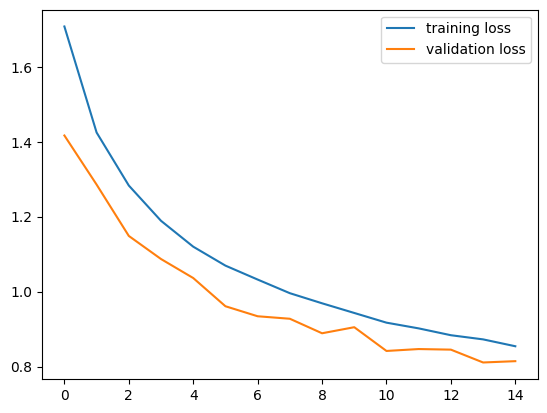

In [29]:
plt.plot(losses,label='training loss')
plt.plot(val_losses,label='validation loss')
plt.legend()

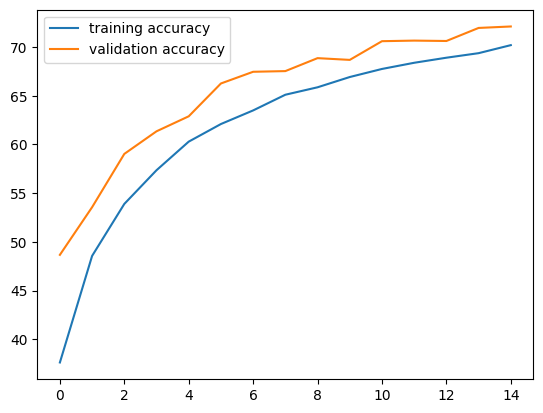

In [30]:
plt.plot(acc,label='training accuracy')
plt.plot(val_acc,label='validation accuracy')
plt.legend()

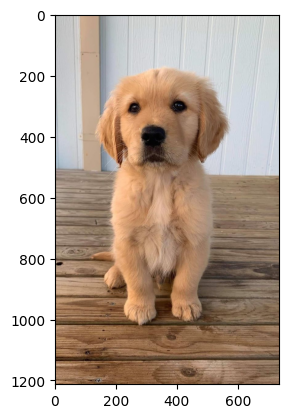

In [31]:
import requests
import PIL
from PIL import Image
from io import BytesIO
url = 'https://i.pinimg.com/736x/ff/40/d6/ff40d6a75bb6dda15b91a97ad452f172.jpg'
req = requests.get(url,stream=True)
img = Image.open(BytesIO(req.content))
plt.imshow(img)

torch.Size([3, 32, 32])


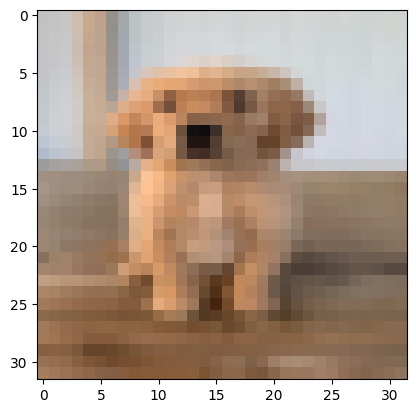

In [32]:
img = transform(img)
plt.imshow(im_convert(img))
print(img.size())

In [33]:
img = img.to(device).unsqueeze(0)
img = img[0]
output = model(img)
_,pred = torch.max(output,1)
print(classes[pred.item()])

dog


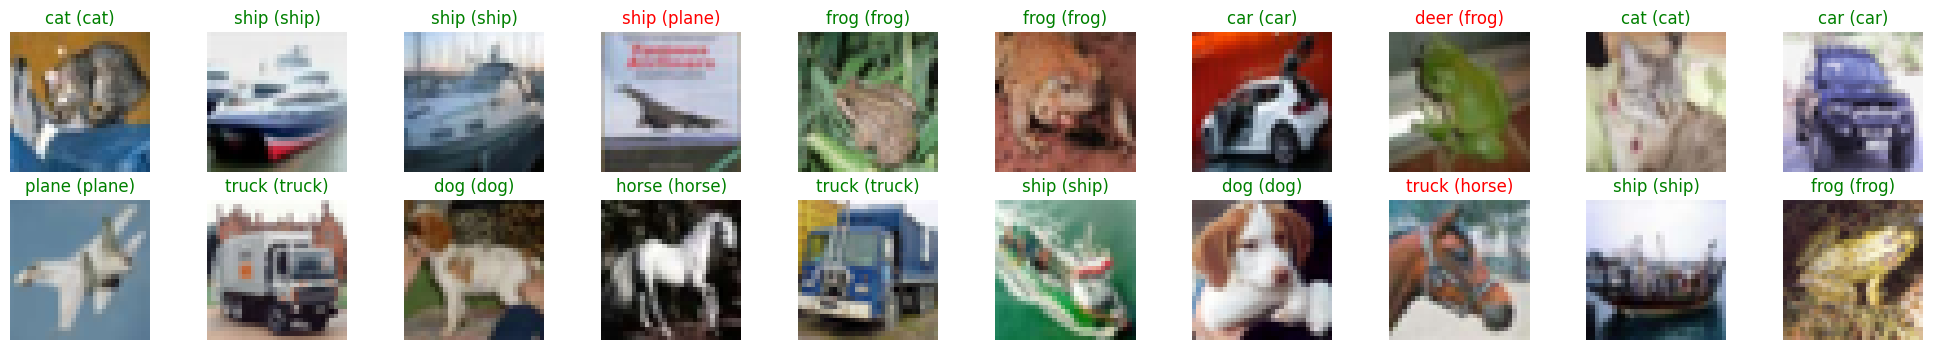

In [34]:
dataiter = iter(val_loader)
images , labels = next(dataiter)
images_ = images.to(device)
labels = labels.to(device)
outputs = model(images_)
_,preds = torch.max(outputs,1)

fig = plt.figure(figsize = (25,4))

for i in range(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.axis('off')
  ax.set_title('{} ({})'.format(str(classes[preds[i].item()]),str(classes[labels[i].item()])) , color = ('green' if preds[i]==labels[i] else 'red'))